In [47]:
# Step 1: Load and prepare the dataset
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Load the inconsistent dataset
dataset = pd.read_csv("crop_recommendation_data_inconsistent.csv")

# Split features and labels
X = dataset.drop(columns=['Recommended Crop'])
y = dataset['Recommended Crop']

# Convert categorical variables to numerical encoding
X = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Observation: A train-test split ensures evaluation is performed on unseen data.

# Step 2: Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Support Vector Machine": SVC(probability=True, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42)
}

# Step 3: Train and evaluate models
results = []

for model_name, model in models.items():
    print(f"\nTraining and evaluating: {model_name}")
    model.fit(X_train, y_train)
    
    # Predictions
    y_pred = model.predict(X_test)
    
    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    results.append((model_name, accuracy))
    print(f"Accuracy: {accuracy:.2f}")
    
    # Classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
    plt.title(f"Confusion Matrix: {model_name}")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()

# Step 4: Summarize results
results_df = pd.DataFrame(results, columns=["Model", "Accuracy"])
results_df.sort_values(by="Accuracy", ascending=False, inplace=True)

print("\nModel Performance Summary:")
print(results_df)

# Plot performance comparison
plt.figure(figsize=(10, 6))
sns.barplot(x="Accuracy", y="Model", data=results_df, palette="viridis")
plt.title("Model Comparison")
plt.xlabel("Accuracy")
plt.ylabel("Model")
plt.show()

# Observations:
# 1. Logistic Regression may struggle with non-linearity in data and missing values.
# 2. SVM may perform better on smaller datasets but is computationally intensive for larger ones.
# 3. XGBoost often outperforms other models but requires fine-tuning.
# 4. Random Forest is robust to inconsistencies but may not always outperform XGBoost.



Training and evaluating: Logistic Regression


ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

###  Simple preprocessing: Replace NaN values with random values in the range of each column   


In [50]:

# Load the inconsistent dataset
dataset = pd.read_csv("crop_recommendation_data_inconsistent.csv")

for column in dataset.select_dtypes(include=['float64', 'int64']).columns:
    col_min = dataset[column].min()
    col_max = dataset[column].max()
    dataset[column] = dataset[column].apply(
        lambda x: np.random.uniform(col_min, col_max) if pd.isna(x) else x
    )



Training and evaluating: Logistic Regression
Accuracy: 0.12

Classification Report:
              precision    recall  f1-score   support

      Barley       1.00      0.05      0.09        21
      Cotton       0.08      0.16      0.11        19
       Maize       0.14      0.27      0.18        22
      Potato       0.00      0.00      0.00        25
        Rice       0.04      0.04      0.04        25
     Soybean       0.08      0.25      0.12        16
   Sugarcane       0.25      0.23      0.24        22
      Tomato       0.28      0.19      0.23        26
       Wheat       0.00      0.00      0.00        28

    accuracy                           0.12       204
   macro avg       0.21      0.13      0.11       204
weighted avg       0.20      0.12      0.11       204



/home/sneha/Documents/Crop-Price-Prediction/.env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


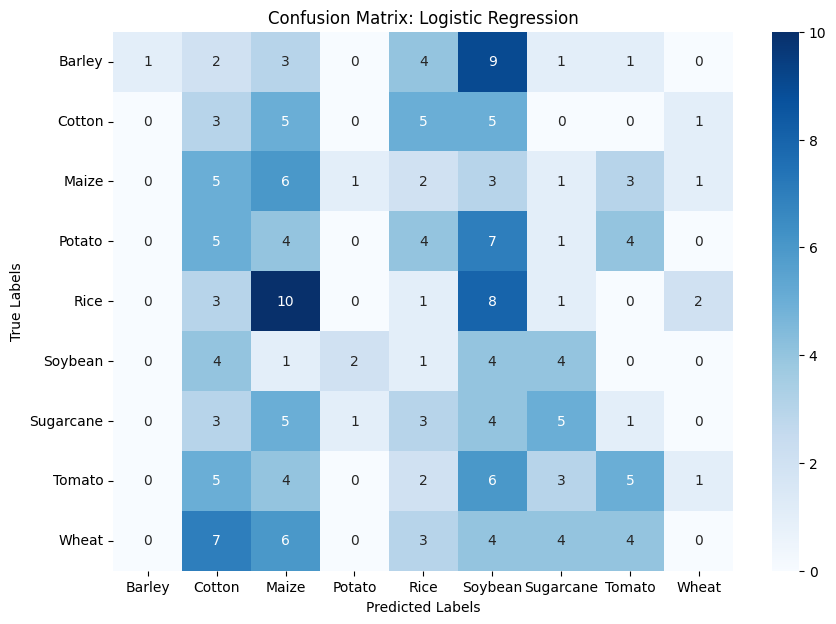


Training and evaluating: Support Vector Machine
Accuracy: 0.13

Classification Report:
              precision    recall  f1-score   support

      Barley       0.00      0.00      0.00        21
      Cotton       0.00      0.00      0.00        19
       Maize       0.13      0.77      0.22        22
      Potato       0.00      0.00      0.00        25
        Rice       0.00      0.00      0.00        25
     Soybean       0.09      0.25      0.13        16
   Sugarcane       0.20      0.05      0.07        22
      Tomato       0.00      0.00      0.00        26
       Wheat       0.25      0.18      0.21        28

    accuracy                           0.13       204
   macro avg       0.07      0.14      0.07       204
weighted avg       0.08      0.13      0.07       204



/home/sneha/Documents/Crop-Price-Prediction/.env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/sneha/Documents/Crop-Price-Prediction/.env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/sneha/Documents/Crop-Price-Prediction/.env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_

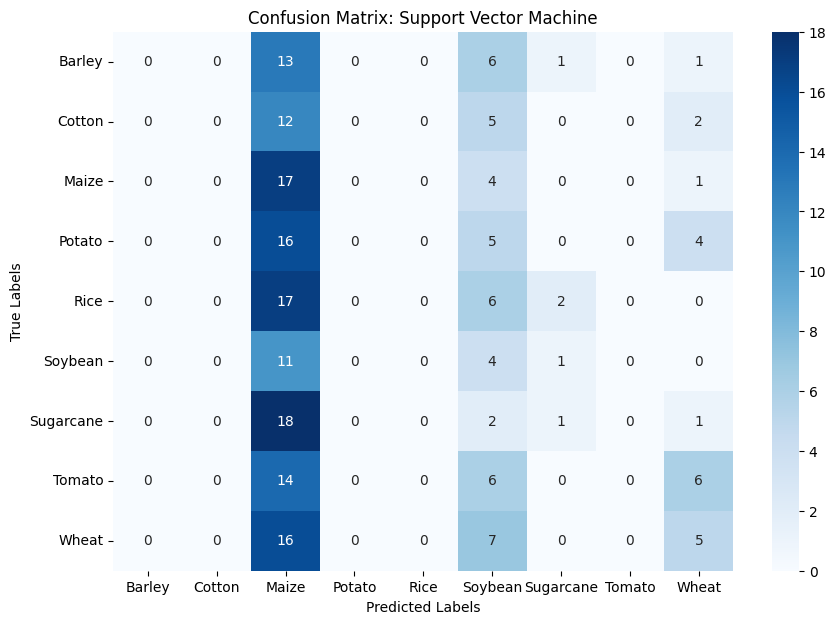


Training and evaluating: Random Forest
Accuracy: 0.15

Classification Report:
              precision    recall  f1-score   support

      Barley       0.20      0.10      0.13        21
      Cotton       0.10      0.16      0.12        19
       Maize       0.03      0.05      0.04        22
      Potato       0.11      0.08      0.09        25
        Rice       0.12      0.12      0.12        25
     Soybean       0.21      0.31      0.25        16
   Sugarcane       0.29      0.23      0.26        22
      Tomato       0.22      0.19      0.20        26
       Wheat       0.17      0.14      0.16        28

    accuracy                           0.15       204
   macro avg       0.16      0.15      0.15       204
weighted avg       0.16      0.15      0.15       204



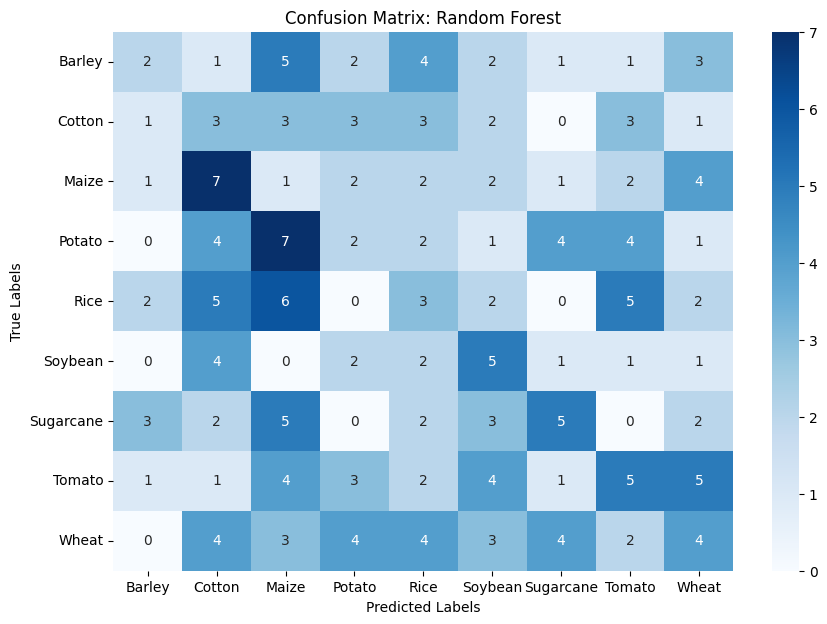


Model Performance Summary:
                    Model  Accuracy
2           Random Forest     0.470
0     Logistic Regression     0.455
1  Support Vector Machine     0.450


/tmp/ipykernel_9149/958164276.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Accuracy", y="Model", data=results_df_raw, palette="viridis")


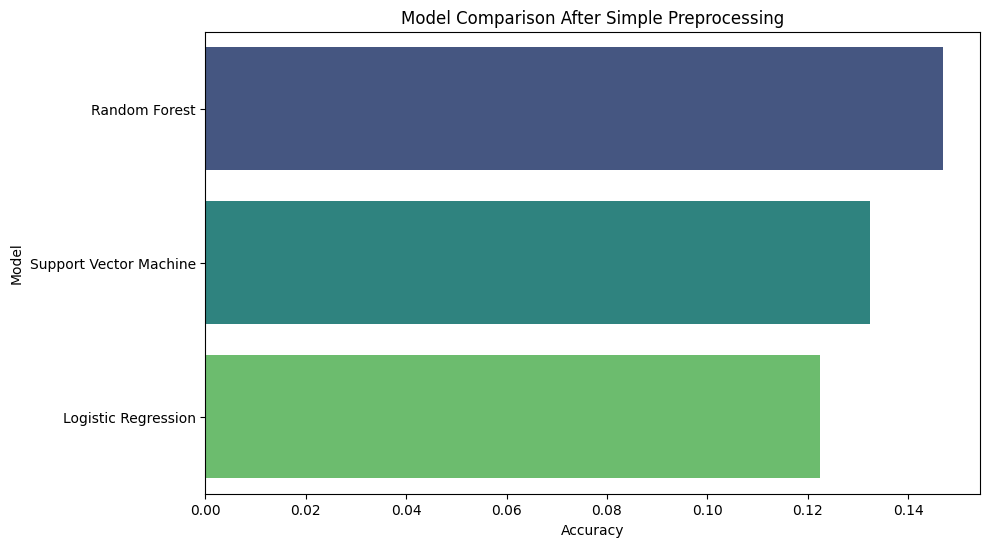

In [51]:
#save raw dataset
dataset.to_csv("raw_data.csv")

# Step 2: Split features and labels
X = dataset.drop(columns=['Recommended Crop'])
y = dataset['Recommended Crop']

# Convert categorical variables to numerical encoding
X = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Observation: Preprocessing ensures no missing data, making the models trainable without errors.

# Step 3: Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Support Vector Machine": SVC(probability=True, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42)
}

# Step 4: Train and evaluate models
results = []

for model_name, model in models.items():
    print(f"\nTraining and evaluating: {model_name}")
    model.fit(X_train, y_train)
    
    # Predictions
    y_pred = model.predict(X_test)
    
    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    results.append((model_name, accuracy))
    print(f"Accuracy: {accuracy:.2f}")
    
    # Classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
    plt.title(f"Confusion Matrix: {model_name}")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()

# Step 5: Summarize results
results_df_raw = pd.DataFrame(results, columns=["Model", "Accuracy"])
results_df_raw.sort_values(by="Accuracy", ascending=False, inplace=True)

print("\nModel Performance Summary:")
print(results_df)

# Plot performance comparison
plt.figure(figsize=(10, 6))
sns.barplot(x="Accuracy", y="Model", data=results_df_raw, palette="viridis")
plt.title("Model Comparison After Simple Preprocessing")
plt.xlabel("Accuracy")
plt.ylabel("Model")
plt.show()


Observations for .ipynb File:
Preprocessing:

Replacing missing values with random values ensures no NaNs are left in the dataset.
However, this method may introduce some noise, as random values might not reflect actual data distribution.
Model Performance:

Models are now evaluated without errors due to missing values.
Comparisons between raw and preprocessed data can highlight the impact of this simple preprocessing step.
Future Improvements:

Use more informed imputation techniques like mean, median, or model-based imputation for missing values.
Address outliers and noisy data for further refinement.

In [52]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
dataset = pd.read_csv("crop_recommendation_data_inconsistent.csv")

# Step 1: Handle missing data
# Fill missing values in numerical columns with the mean
numerical_cols = dataset.select_dtypes(include=['float64', 'int64']).columns
imputer = SimpleImputer(strategy='mean')
dataset[numerical_cols] = imputer.fit_transform(dataset[numerical_cols])

# Refine 'Recommended Crop' based on feature logic
conditions = [
    (dataset['Rainfall (mm)'] > 1000) & (dataset['Temperature (°C)'] < 25),
    (dataset['Soil Type'] == 'Sandy') & (dataset['Temperature (°C)'] > 30),
    (dataset['Season'] == 'Winter') & (dataset['Humidity (%)'] > 50),
]
choices = ['Rice', 'Cotton', 'Wheat']
dataset['Recommended Crop'] = np.select(conditions, choices, default=dataset['Recommended Crop'])


# Step 2: Handle duplicates
dataset = dataset.drop_duplicates()

# Step 3: Feature scaling/normalization
scaler = StandardScaler()
scaled_features = scaler.fit_transform(dataset[numerical_cols])
scaled_numerical_df = pd.DataFrame(scaled_features, columns=numerical_cols)

# Step 4: Encode categorical variables
categorical_cols = dataset.select_dtypes(include=['object']).columns
label_encoders = {col: LabelEncoder() for col in categorical_cols}
encoded_categorical_df = pd.DataFrame()

for col in categorical_cols:
    encoded_categorical_df[col] = label_encoders[col].fit_transform(dataset[col])

# Combine scaled numerical data and encoded categorical data
processed_dataset = pd.concat([scaled_numerical_df, encoded_categorical_df], axis=1)

# Step 5: Feature engineering
# Add interaction terms (Rainfall * Temperature, for instance)
processed_dataset['Rainfall_Temperature_Interaction'] = (
    processed_dataset['Rainfall (mm)'] * processed_dataset['Temperature (°C)']
)

# Step 6: Dimensionality reduction using PCA
pca = PCA(n_components=0.95)  # Retain 95% variance
features_for_pca = processed_dataset.drop(columns=['Recommended Crop'])
principal_components = pca.fit_transform(features_for_pca)
pca_dataset = pd.DataFrame(principal_components)
pca_dataset['Recommended Crop'] = processed_dataset['Recommended Crop']


#save preprocessed data
pca_dataset.to_csv("processed_dataset.csv")


# Step 7: Split the data into training and testing sets
X = pca_dataset.drop(columns=['Recommended Crop'])
y = pca_dataset['Recommended Crop']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)





Training and evaluating: Logistic Regression
Accuracy: 0.46

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.58      0.78      0.67        37
           2       0.50      0.09      0.15        11
           3       0.00      0.00      0.00        14
           4       0.59      0.81      0.68        52
           5       0.15      0.18      0.17        11
           6       0.50      0.05      0.10        19
           7       0.00      0.00      0.00         8
           8       0.31      0.42      0.36        38

    accuracy                           0.46       200
   macro avg       0.29      0.26      0.24       200
weighted avg       0.40      0.46      0.40       200



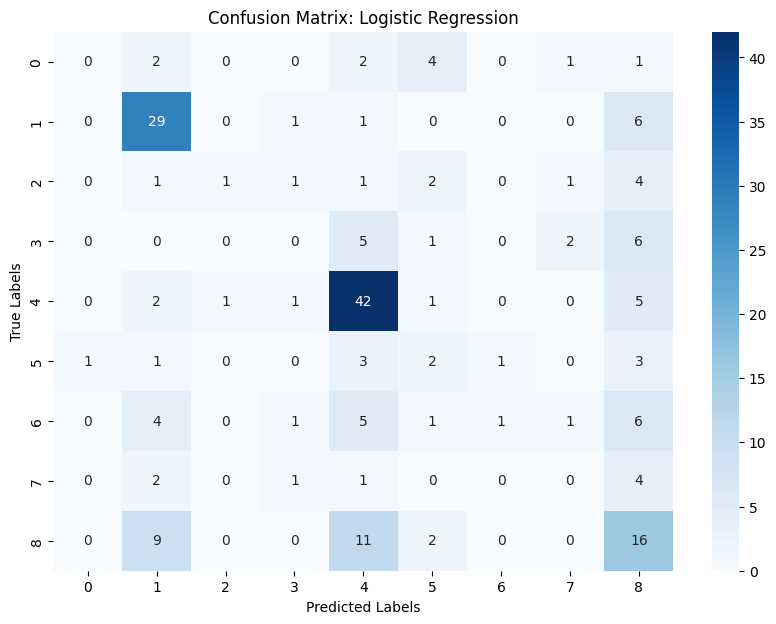


Training and evaluating: Support Vector Machine
Accuracy: 0.45

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.52      0.78      0.62        37
           2       0.00      0.00      0.00        11
           3       0.00      0.00      0.00        14
           4       0.53      0.81      0.64        52
           5       0.00      0.00      0.00        11
           6       0.00      0.00      0.00        19
           7       0.00      0.00      0.00         8
           8       0.34      0.50      0.40        38

    accuracy                           0.45       200
   macro avg       0.15      0.23      0.18       200
weighted avg       0.30      0.45      0.36       200



/home/sneha/Documents/Crop-Price-Prediction/.env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/sneha/Documents/Crop-Price-Prediction/.env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/sneha/Documents/Crop-Price-Prediction/.env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_

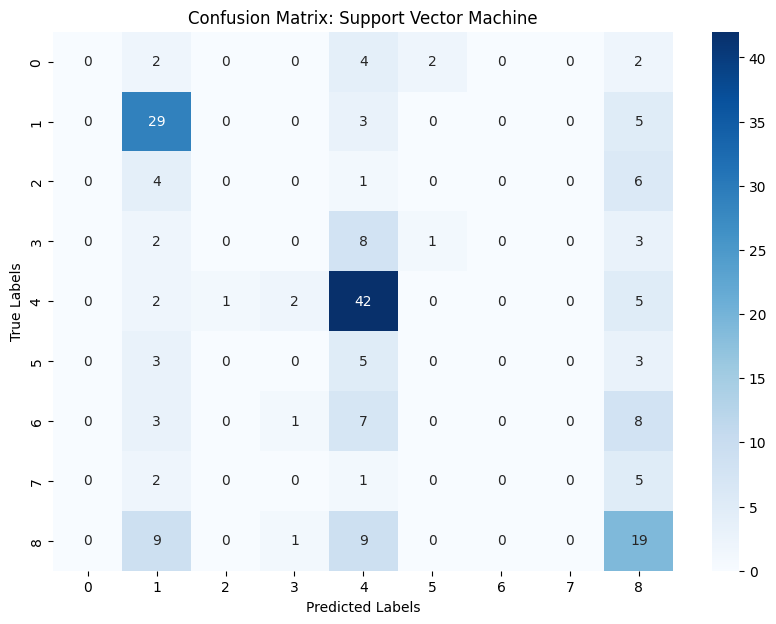


Training and evaluating: Random Forest
Accuracy: 0.47

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.62      0.78      0.69        37
           2       0.00      0.00      0.00        11
           3       0.00      0.00      0.00        14
           4       0.51      0.81      0.63        52
           5       0.20      0.09      0.12        11
           6       0.00      0.00      0.00        19
           7       0.00      0.00      0.00         8
           8       0.37      0.58      0.45        38

    accuracy                           0.47       200
   macro avg       0.19      0.25      0.21       200
weighted avg       0.33      0.47      0.38       200



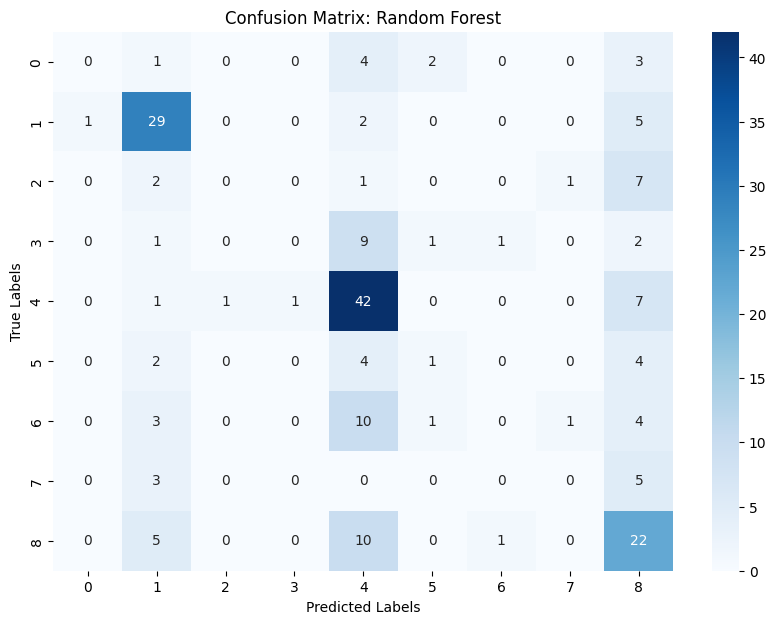


Model Performance Summary:
                    Model  Accuracy
2           Random Forest     0.470
0     Logistic Regression     0.455
1  Support Vector Machine     0.450


/tmp/ipykernel_9149/2998909503.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Accuracy", y="Model", data=results_df, palette="viridis")


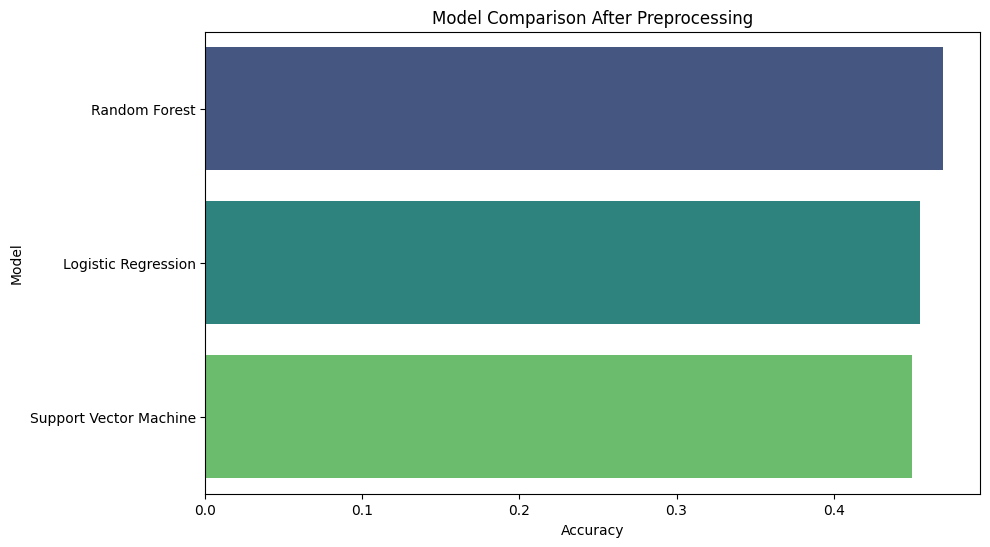

In [53]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Support Vector Machine": SVC(probability=True, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42)
}

results = []

for model_name, model in models.items():
    print(f"\nTraining and evaluating: {model_name}")
    model.fit(X_train, y_train)
    
    # Predictions
    y_pred = model.predict(X_test)
    
    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    results.append((model_name, accuracy))
    print(f"Accuracy: {accuracy:.2f}")
    
    # Classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix: {model_name}")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()

# Step 4: Summarize results
results_df = pd.DataFrame(results, columns=["Model", "Accuracy"])
results_df.sort_values(by="Accuracy", ascending=False, inplace=True)

print("\nModel Performance Summary:")
print(results_df)

# Plot performance comparison
plt.figure(figsize=(10, 6))
sns.barplot(x="Accuracy", y="Model", data=results_df, palette="viridis")
plt.title("Model Comparison After Preprocessing")
plt.xlabel("Accuracy")
plt.ylabel("Model")
plt.show()


results_df_raw.to_csv("results_df_raw.csv")
results_df.to_csv("result_df.csv")